<h1 align="center">An Introduction to Machine Learning - 25737</h1>
<h4 align="center">Dr. Sajjad Amini</h4>
<h4 align="center">Sharif University of Technology, Spring 2023</h4>

**Student Name**:Amirreza Velaei

**Student ID**:400102222

# Effect of Overfitting

In this exercise, we want to examine the effect of **overfitting**. As you learned in class, using too many features in training can result in a model with very low loss on the training set but high loss on the validation and test set. For this purpose, we have prepared a dataset in the `q2-train.npy`, `q2-valid.npy`, and `q2-test.npy` files for you. We know that `y` is a polynomial function of `x` in this dataset, meaning that 

$$
y = \sum_{i=0}^{k}a_ix^i
$$

However, we do not know the exact value of `k`.

## Importing Libraries

First, we import the necessary libraries for this assignment. Please note that you should only use these libraries and no other libraries are acceptable.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## Reading Data and Preprocessing

In this part of the assignment, you should read data from the `.npy` files. The data in `q2-train.npy` file is your training set and should be stored in the `X_train` and `Y_train` variables. Similarly, the data in `q2-valid.npy` file is your validation set, and the data in `q2-test.npy` file is your test set, which should be stored in `X_val`, `Y_val`, `X_test`, and `Y_test` respectively. You can use the `np.load` function to read the `.npy` files.

In [14]:
X_train, Y_train, X_val, Y_val, X_test, Y_test = None, None, None, None, None, None

### START CODE HERE ###
X_train = np.load('q2-train.npy')[:,0]
X_val = np.load('q2-valid.npy')[:,0]
X_test = np.load('q2-test.npy')[:,0]

Y_train = np.load('q2-train.npy')[:,1]
Y_val = np.load('q2-valid.npy')[:,1]
Y_test = np.load('q2-test.npy')[:,1]
### END CODE HERE ###

[-1.93239324  1.19351935 -1.8219822   0.62986299 -0.49384938  0.10461046
 -1.65036504  0.51665167  1.49994999  0.97709771  0.94629463  0.89428943
  1.00950095 -0.28942894  0.0650065  -1.18551855  0.58865887  0.78827883
  0.12541254  1.58555856 -0.30583058  0.22382238 -0.64546455  0.11541154
 -1.48954895  1.79077908 -1.919992    0.44424442 -1.32873287  1.57115712]


To find the best value of `k`, we want to change `k` from 1 to 12 and examine its effect on the validation set, and then choose the right value of `k`. For this purpose, we need to create a matrix with columns equal to $x^0$, $x^1$, $x^2$, ..., $x^k$ for every value of `k`. You can complete the following function to do this job. The function takes an $m \times 1$ vector `X` containing values of input `x` and returns an $m \times (k+1)$ matrix that has the properties mentioned above.

In [47]:
def create_matrix(X):
  '''
  X: an m by 1 array 
  '''
  new_X = None
  ### START CODE HERE ###
  new_X = np.zeros((X.shape[0], 11))
  for i in range(X.shape[0]):
    for j in range(11):
      new_X[i][j] = X[i]**j
  ### END CODE HERE ###
  return new_X

## Validate Model

Now, we want to train our model for every value of `k`. You can use any of the methods that we used in **Question 1** (gradient descent or direct calculation) for this purpose. The following function trains our model on the training set for a given value of `k`, and then returns the loss on the training set and validation set, as well as the weight vector `w`.

In [5]:
# If you need any other function for training write it here
# (like gradient descent or anything else)


In [48]:
def train(X_train, Y_train, X_val, Y_val, k):
  '''
  X_train: an m_train by 1 vector contains training points
  Y_train: an m_train by 1 vector contains training values
  X_val: an m_val by 1 vector contains validation points
  Y_val: an m_val by 1 vector contains validation values
  k: degree of polynomial
  '''
  w, loss_train, loss_val = None, None , None
  ### START CODE HERE ###
  X_train = create_matrix(X_train)
  X_val = create_matrix(X_val)
  X_train = np.matrix(X_train[:,0:k+1])
  X_val = np.matrix(X_val[:,0:k+1])
  Y_train = np.matrix(Y_train).T
  Y_val = np.matrix(Y_val).T
  w = np.linalg.inv(X_train.T*X_train)*X_train.T*Y_train
  loss_train = np.linalg.norm(X_train*w - Y_train)**2
  loss_val = np.linalg.norm(X_val*w - Y_val)**2
  ### END CODE HERE ###
  return w, loss_train, loss_val

In the cell below, you can change the value of `k` between 1 and 12 and plot the loss on the training and validation set as a function of `k` in the same plot.

**Question**: Discuss about the effect of $k$.

**Answer**: As we can see in the plot, the loss on the training set decreases as k increases. But the loss on the validation set decreases until k=8 and then increases. This is because when k is small, the model is not complex enough to fit the training data. But when k is large, the model is too complex and fits the noise in the training data. So the loss on the validation set increases. So we should choose k=8.

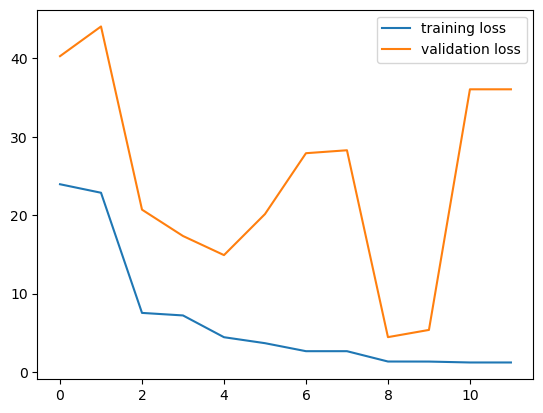

In [58]:
### START CODE HERE ###
#plot the training and validation loss for k = 0, 1, 2, ..., 11
loss_train = []
loss_val = []
for i in range(12):
    w, loss_train_i, loss_val_i = train(X_train, Y_train, X_val, Y_val, i)
    loss_train.append(loss_train_i)
    loss_val.append(loss_val_i)
plt.plot(range(12), loss_train, label = 'training loss')
plt.plot(range(12), loss_val, label = 'validation loss')
plt.legend()
plt.show()

### END CODE HERE ###

## Evaluating Model

In the cell below find the loss of your best model on the test set.

**Question**: Why we need test set?

**Answer**: We need the test set to evaluate the performance of our model on unseen data. We should not use the test set to choose the best model. We should use the validation set for this purpose. We should use the test set only once to evaluate the performance of our model.

In [59]:
### START CODE HERE ###
#plot the training and validation loss for k = 0, 1, 2, ..., 11
w, loss_train, loss_val = train(X_train, Y_train, X_val, Y_val, 8)
print('training loss: ', loss_train)
print('validation loss: ', loss_val)
### END CODE HERE ###

training loss:  1.3446339278283044
validation loss:  4.451727667539965
